<a href="https://colab.research.google.com/github/ahamedafzal/Emotion_prediction/blob/main/Emotion_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Emotion analysis**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
df1=pd.read_csv("/content/drive/MyDrive/Data sets/train.csv",sep=";",names=["Text","Emotion"])
df2=pd.read_csv("/content/drive/MyDrive/Data sets/test.csv",sep=";",names=["Text","Emotion"])
df=pd.concat([df1,df2])
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


In [2]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
df.isna().sum()

Text       0
Emotion    0
dtype: int64

In [4]:
df["Emotion"].value_counts()

joy         6057
sadness     5247
anger       2434
fear        2161
love        1463
surprise     638
Name: Emotion, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

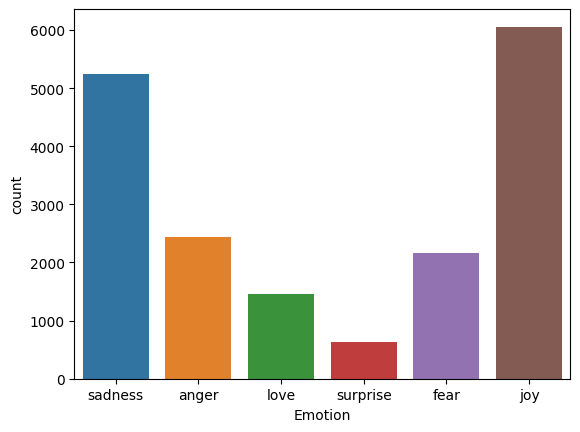

In [5]:
sns.countplot(x="Emotion",data=df)

In [6]:
df['Emotion'] = df['Emotion'].map({'joy' : 0,'sadness': 1,'anger': 2,'fear': 3,'love': 4,'surprise':5})
df["Emotion"]

0       1
1       1
2       2
3       4
4       2
       ..
1995    2
1996    2
1997    0
1998    0
1999    3
Name: Emotion, Length: 18000, dtype: int64

In [7]:
df.reset_index(drop=True,inplace=True)
df

,Text,Emotion
0,i didnt feel humiliated,1
1,i can go from feeling so hopeless to so damned...,1
2,im grabbing a minute to post i feel greedy wrong,2
3,i am ever feeling nostalgic about the fireplac...,4
4,i am feeling grouchy,2
...,...,...
17995,i just keep feeling like someone is being unki...,2
17996,im feeling a little cranky negative after this...,2
17997,i feel that i am useful to my people and that ...,0
17998,im feeling more comfortable with derby i feel ...,0


Extracted the text to be processed

In [8]:
text=df.Text
text

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
17995    i just keep feeling like someone is being unki...
17996    im feeling a little cranky negative after this...
17997    i feel that i am useful to my people and that ...
17998    im feeling more comfortable with derby i feel ...
17999    i feel all weird when i have to meet w people ...
Name: Text, Length: 18000, dtype: object

In [9]:
text=text.str.replace("[^a-zA-Z0-9]+"," ")
text

<ipython-input-9-f005ee68dbac>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  text=text.str.replace("[^a-zA-Z0-9]+"," ")


0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
17995    i just keep feeling like someone is being unki...
17996    im feeling a little cranky negative after this...
17997    i feel that i am useful to my people and that ...
17998    im feeling more comfortable with derby i feel ...
17999    i feel all weird when i have to meet w people ...
Name: Text, Length: 18000, dtype: object

Removing stopwords

In [10]:
import nltk
nltk.download('stopwords')
from nltk.stem.snowball import stopwords
sw=stopwords.words("english")
sw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
from nltk.stem import WordNetLemmatizer
from nltk import TweetTokenizer
lem=WordNetLemmatizer()
tt=TweetTokenizer()

**Tokenization**

In [12]:
nltk.download('wordnet')
text=text.apply(lambda line:[lem.lemmatize(token.lower(),pos="v") for token in tt.tokenize(line)]).apply(lambda i:" ".join(i))
text

[nltk_data] Downloading package wordnet to /root/nltk_data...


0                                   i didnt feel humiliate
1        i can go from feel so hopeless to so damn hope...
2             im grab a minute to post i feel greedy wrong
3        i be ever feel nostalgic about the fireplace i...
4                                        i be feel grouchy
                               ...                        
17995    i just keep feel like someone be be unkind to ...
17996    im feel a little cranky negative after this do...
17997    i feel that i be useful to my people and that ...
17998    im feel more comfortable with derby i feel as ...
17999    i feel all weird when i have to meet w people ...
Name: Text, Length: 18000, dtype: object

In [13]:
text=text.apply(lambda line:[token for token in tt.tokenize(line) if token not in sw]).apply(lambda i:" ".join(i))
text

0                                     didnt feel humiliate
1        go feel hopeless damn hopeful around someone c...
2                    im grab minute post feel greedy wrong
3        ever feel nostalgic fireplace know still property
4                                             feel grouchy
                               ...                        
17995    keep feel like someone unkind wrong think get ...
17996    im feel little cranky negative doctor appointment
17997       feel useful people give great feel achievement
17998    im feel comfortable derby feel though start st...
17999    feel weird meet w people text like dont talk f...
Name: Text, Length: 18000, dtype: object

**Vectorization**

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(text)
print(X)

  (0, 5418)	0.7885907572270544
  (0, 4129)	0.11919175887394268
  (0, 3032)	0.6032561166143257
  (1, 814)	0.45013399290689354
  (1, 1626)	0.3202158384110556
  (1, 10523)	0.3041616007729675
  (1, 609)	0.29139487616049514
  (1, 5334)	0.38645512507323787
  (1, 2676)	0.40815267168585334
  (1, 5336)	0.38645512507323787
  (1, 4755)	0.22042988301780878
  (1, 4129)	0.05952216310542247
  (2, 12746)	0.38521063034554776
  (2, 4860)	0.42432545745696193
  (2, 8736)	0.3582845232944347
  (2, 7232)	0.4916389941657675
  (2, 4807)	0.5087460274520461
  (2, 5532)	0.19569501038855905
  (2, 4129)	0.06606753110917364
  (3, 8965)	0.5478911646636684
  (3, 10808)	0.2575662645593418
  (3, 6314)	0.22607249416444372
  (3, 4236)	0.5611963967160257
  (3, 7797)	0.40383908137706487
  (3, 3839)	0.3173146000132319
  :	:
  (17996, 5532)	0.18830701831011748
  (17996, 4129)	0.06357331117220327
  (17997, 12144)	0.456964419241304
  (17997, 100)	0.6255993771890086
  (17997, 4708)	0.345170498164978
  (17997, 8383)	0.29334319708

In [15]:
X.shape

(18000, 12886)

In [16]:
X=X.toarray()
df_1=pd.DataFrame(X)

In [17]:
X=df_1.iloc[:,:-1]
X

,0,1,2,3,4,5,6,7,8,9,...,12875,12876,12877,12878,12879,12880,12881,12882,12883,12884
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
y=df.iloc[:,-1]
y

0        1
1        1
2        2
3        4
4        2
        ..
17995    2
17996    2
17997    0
17998    0
17999    3
Name: Emotion, Length: 18000, dtype: int64

**Train test split**

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

**Modelling**

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [21]:
rf=RandomForestClassifier(random_state=1)
knn=KNeighborsClassifier(n_neighbors=5)
mnb=MultinomialNB()
models=[rf,knn,mnb]
for model in models:
  print("_"*50,model,"_"*50)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_pred,y_test))

__________________________________________________ RandomForestClassifier(random_state=1) __________________________________________________
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1865
           1       0.90      0.91      0.91      1585
           2       0.87      0.84      0.85       769
           3       0.82      0.80      0.81       635
           4       0.63      0.83      0.72       350
           5       0.66      0.67      0.67       196

    accuracy                           0.85      5400
   macro avg       0.80      0.82      0.80      5400
weighted avg       0.86      0.85      0.86      5400

__________________________________________________ KNeighborsClassifier() __________________________________________________
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      2136
           1       0.84      0.78      0.81      1708
           2       0.70     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
import pickle
filename="model.csv"
pickle.dump(rf,open(filename,"wb"))

In [24]:
v_name="vectorizer"
pickle.dump(vectorizer,open(v_name,"wb"))